# TASK 3: CAR PRICE PREDICTION

# importing libraries

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# loading the dataset

In [122]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# analysis

In [123]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [124]:
df['Selling_type'].value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [128]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [129]:
df['Fuel_Type'] = df['Fuel_Type'].replace(['Petrol'], 0)
df['Fuel_Type'] = df['Fuel_Type'].replace(['Diesel'], 1)
df['Fuel_Type'] = df['Fuel_Type'].replace(['CNG'], 2)

In [130]:
df['Selling_type'] = df['Selling_type'].replace(['Dealer'], 0)
df['Selling_type'] = df['Selling_type'].replace(['Individual'], 1)

In [131]:
df['Transmission'] = df['Transmission'].replace(['Manual'], 0)
df['Transmission'] = df['Transmission'].replace(['Automatic'], 1)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Selling_type   301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [133]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


# visualization

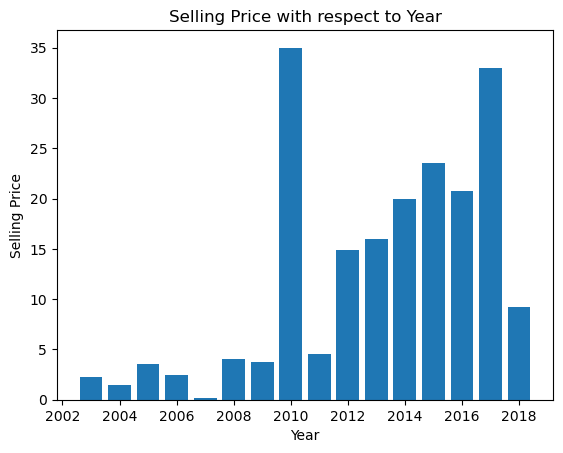

In [134]:
plt.bar(df['Year'].values,df['Selling_Price'].values)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Selling Price with respect to Year')
plt.show()

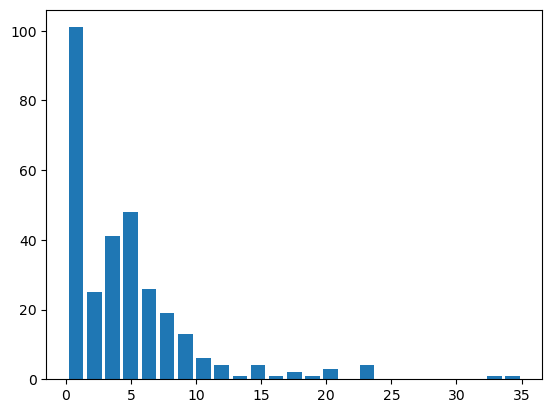

In [135]:
plt.hist(df["Selling_Price"], bins=25, rwidth=0.8)
plt.show()

C:\Users\Nighat Raza\AppData\Local\Temp\ipykernel_14152\1409212873.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Selling_Price'])


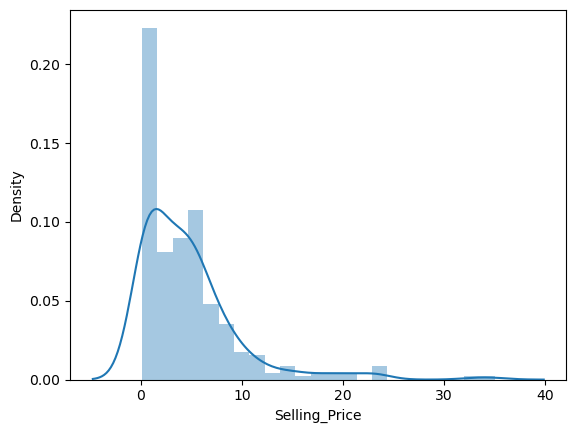

In [136]:
sns.distplot(df['Selling_Price'])
plt.show()

# separating input features and outcome

In [137]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [138]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']
print(type(X),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


# splitting into train test data

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# training the model

In [140]:
model = LinearRegression()

In [141]:
model.fit(X_train, y_train)

LinearRegression()

# predicting test values

In [142]:
prediction = model.predict(X_test)

# checking actual vs predicted

In [143]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [144]:
print('Mean Absolute Error:',mean_absolute_error(prediction, y_test))
print('Mean Squared Error:',mean_squared_error(prediction, y_test))
print('R2 score:',r2_score(prediction, y_test))

Mean Absolute Error: 1.2330974094820157
Mean Squared Error: 3.4334172176597804
R2 score: 0.8338351947584023


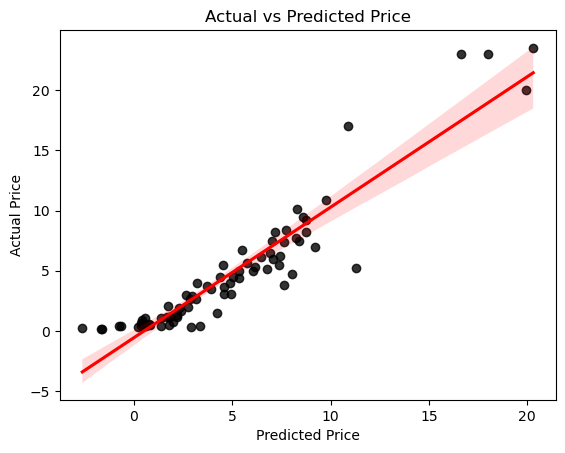

In [145]:
sns.regplot(x=prediction, y=y_test, scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual vs Predicted Price')
plt.show()